In [1]:
from mealpy import SMA, GA, PSO, ABC, SOS
from knn.knn_problem import KnnMetaHeuristicProblem
from knn.knn_problem_bounds import problem_bounds, termination
from utils.visualize import plot_fitness
from dataset_utils.data import load_titanic_dataset, load_diabetes_dataset, load_cinnamon_dataset

## Diabetes Dataset

2025/07/06 09:38:17 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: OriginalSOS(epoch=80, pop_size=100)
2025/07/06 09:38:28 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 1, Current best: 0.7924705512418247, Global best: 0.7924705512418247, Runtime: 8.33360 seconds
2025/07/06 09:38:35 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 2, Current best: 0.8041404956935919, Global best: 0.8041404956935919, Runtime: 7.86025 seconds
2025/07/06 09:38:44 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 3, Current best: 0.8041404956935919, Global best: 0.8041404956935919, Runtime: 8.32840 seconds
2025/07/06 09:38:52 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 4, Current best: 0.8041404956935919, Global best: 0.8041404956935919, Runtime: 7.98938 seconds
2025/07/06 09:39:00 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 5, Current best: 0.8041404956935919, Global best: 0.8041404956935919, Runtime: 7.84857 sec

Best accuracy: 0.8068994091061557
Best parameters: 
{'test_size': 0.19664023928593596, 'n_neighbors': 26, 'leaf_size': 5, 'p': 3, 'weights': 'uniform', 'algorithm': 'auto', 'metric': 'manhattan'}


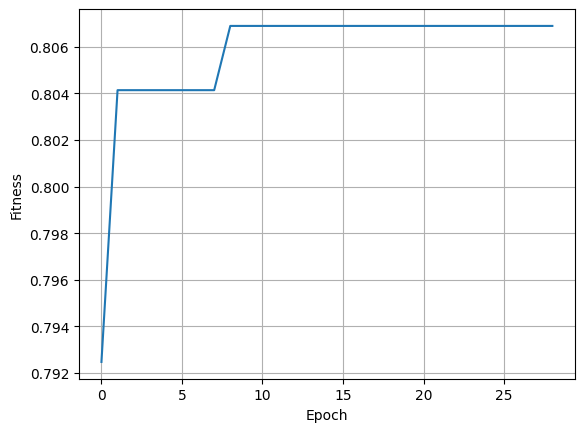

In [3]:
diabetes_df = load_diabetes_dataset()
diabetes_problem = KnnMetaHeuristicProblem(diabetes_df[0], diabetes_df[1], problem_bounds, complexity_weight=0.01)
diabetes_model = SOS.OriginalSOS(epoch=80)
diabetes_model.solve(diabetes_problem, termination=termination)

plot_fitness(diabetes_model)

2025/07/09 01:41:14 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: OriginalSOS(epoch=80, pop_size=100)
2025/07/09 01:41:24 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 1, Current best: 0.791055448275862, Global best: 0.791055448275862, Runtime: 7.80670 seconds
2025/07/09 01:41:32 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 2, Current best: 0.791055448275862, Global best: 0.791055448275862, Runtime: 7.60625 seconds
2025/07/09 01:41:39 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 3, Current best: 0.7924534482758621, Global best: 0.7924534482758621, Runtime: 7.85743 seconds
2025/07/09 01:41:46 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 4, Current best: 0.7942526315789473, Global best: 0.7942526315789473, Runtime: 7.03815 seconds
2025/07/09 01:41:53 PM, INFO, mealpy.bio_based.SOS.OriginalSOS: >>>Problem: P, Epoch: 5, Current best: 0.7942526315789473, Global best: 0.7942526315789473, Runtime: 6.75087 seconds

Best accuracy: 0.8084985263157894
Best parameters: 
{'test_size': 0.1967135085276483, 'n_neighbors': 26, 'leaf_size': 5, 'p': 3, 'weights': 'uniform', 'algorithm': 'auto', 'metric': 'manhattan'}


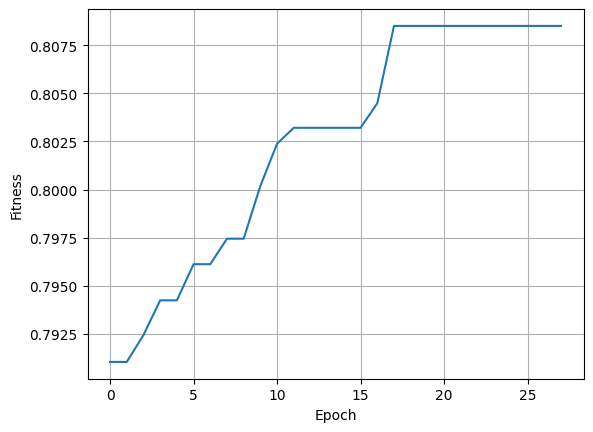

In [2]:
diabetes_df = load_diabetes_dataset()
diabetes_problem = KnnMetaHeuristicProblem(diabetes_df[0], diabetes_df[1], problem_bounds, complexity_weight=0.01)
diabetes_model = SOS.OriginalSOS(epoch=80)
diabetes_model.solve(diabetes_problem, termination=termination)

plot_fitness(diabetes_model)

## Titanic Dataset

2025/07/09 02:26:25 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=80, pop_size=500, p_t=0.03)


2025/07/09 02:26:40 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 0.79856, Global best: 0.79856, Runtime: 5.08854 seconds
2025/07/09 02:26:44 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 0.79856, Global best: 0.79856, Runtime: 4.56756 seconds
2025/07/09 02:26:49 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 0.79856, Global best: 0.79856, Runtime: 4.56238 seconds
2025/07/09 02:26:53 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 0.79856, Global best: 0.79856, Runtime: 4.40579 seconds
2025/07/09 02:26:57 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 0.79856, Global best: 0.79856, Runtime: 4.25149 seconds
2025/07/09 02:27:02 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 6, Current best: 0.8026911627906977, Global best: 0.8026911627906977, Runtime: 4.39833 seconds
2025/07/09 02:27:06 PM, 

Best accuracy: 0.8026911627906977
Best parameters: 
{'test_size': 0.3, 'n_neighbors': 3, 'leaf_size': 1, 'p': 1, 'weights': 'distance', 'algorithm': 'auto', 'metric': 'euclidean'}


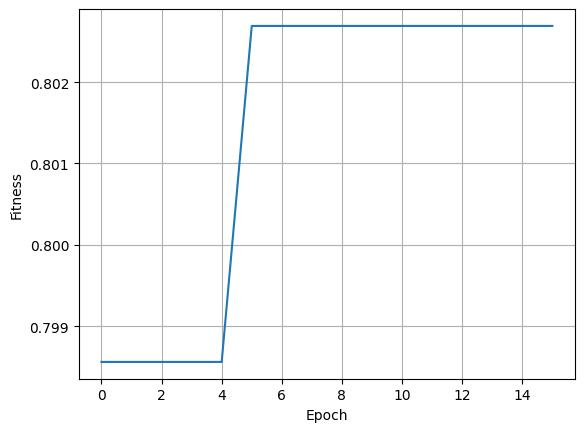

In [2]:
titanic_df = load_titanic_dataset()
titanic_problem = KnnMetaHeuristicProblem(titanic_df[0], titanic_df[1], problem_bounds, complexity_weight=0.2)
titanic_model = SMA.OriginalSMA(epoch=80, pop_size=500)
titanic_model.solve(titanic_problem, termination=termination)

plot_fitness(titanic_model)

2025/07/06 09:51:16 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=80, pop_size=200, p_t=0.03)
2025/07/06 09:51:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 0.7738307406403129, Global best: 0.8003553853333186, Runtime: 2.16702 seconds
2025/07/06 09:51:24 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 0.8031732226786205, Global best: 0.8031732226786205, Runtime: 1.88509 seconds
2025/07/06 09:51:26 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 0.7723180021557485, Global best: 0.8031732226786205, Runtime: 1.72926 seconds
2025/07/06 09:51:28 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 0.8031732226786205, Global best: 0.8031732226786205, Runtime: 1.66456 seconds
2025/07/06 09:51:29 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 0.766872474915048, Global best: 0.8031732226786205, Runtime: 1.

Best accuracy: 0.8035220598879228
Best parameters: 
{'test_size': 0.278831466806826, 'n_neighbors': 3, 'leaf_size': 1, 'p': 1, 'weights': 'distance', 'algorithm': 'auto', 'metric': 'euclidean'}


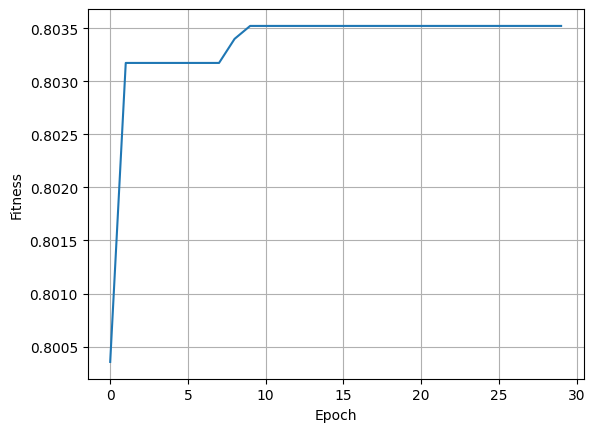

In [8]:
titanic_df = load_titanic_dataset()
titanic_problem = KnnMetaHeuristicProblem(titanic_df[0], titanic_df[1], problem_bounds, complexity_weight=0.05)
titanic_model = SMA.OriginalSMA(epoch=80, pop_size=200)
titanic_model.solve(titanic_problem, termination=termination)

plot_fitness(titanic_model)

2025/07/09 01:46:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: OriginalPSO(epoch=80, pop_size=80, c1=2.05, c2=2.05, w=0.4)
2025/07/09 01:46:24 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 1, Current best: 0.8036187149532711, Global best: 0.8036187149532711, Runtime: 1.49785 seconds
2025/07/09 01:46:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 2, Current best: 0.8058263157894736, Global best: 0.8058263157894736, Runtime: 1.55532 seconds
2025/07/09 01:46:27 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 3, Current best: 0.8058263157894736, Global best: 0.8058263157894736, Runtime: 1.72360 seconds
2025/07/09 01:46:29 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 4, Current best: 0.8101023148148148, Global best: 0.8101023148148148, Runtime: 1.55858 seconds
2025/07/09 01:46:30 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 5, Current best: 0.8101023148148148, Global best: 0.81

Best accuracy: 0.8134593181818183
Best parameters: 
{'test_size': 0.2617694947780308, 'n_neighbors': 6, 'leaf_size': 5, 'p': 3, 'weights': 'uniform', 'algorithm': 'kd_tree', 'metric': 'minkowski'}


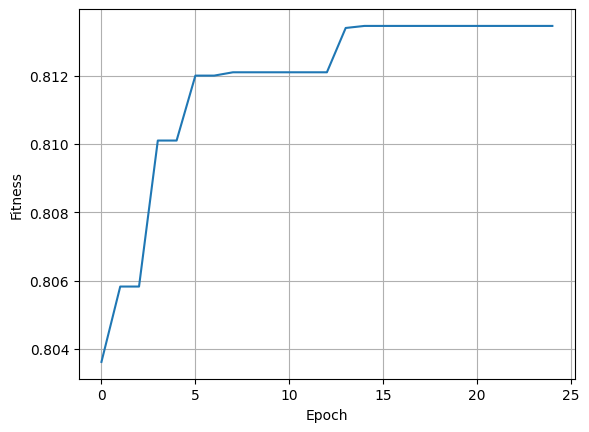

In [3]:
titanic_df = load_titanic_dataset()
titanic_problem = KnnMetaHeuristicProblem(titanic_df[0], titanic_df[1], problem_bounds, complexity_weight=0.05)
titanic_model = PSO.OriginalPSO(epoch=80, pop_size=80)
titanic_model.solve(titanic_problem, termination=termination)

plot_fitness(titanic_model)